<a href="https://colab.research.google.com/github/barish-bit/Analyzing_Convection-Soil_Moisture_Regimes_from_Reanalysis_Data/blob/main/Week_2_NetCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Extracting one month data from the one year net cdf file
import xarray as xr
import pandas as pd

df = ["/content/RF25_IMD0p252021.nc"]

ds = xr.concat([xr.open_dataset(f) for f in df], dim=['TIME'])

data = ds['RAINFALL'].to_dataframe()
data.to_csv("rainfall data.csv")

In [ ]:

df = pd.read_csv("/content/rainfall data.csv")
my_month=int(input("Enter the number of days in your month:"))
before_month_1=int(input("Enter the number of 31 days month before your month:"))
before_month_2=int(input("Enter the number of 30 days month before your month:"))
before_month_3=int(input("Enter the number of 28 days month before your month:"))
x=df.iloc[(31*before_month_1 + 30*before_month_2 + 28*before_month_3)*135*129:(31*before_month_1 + 30*before_month_2 + 28*before_month_3 + my_month)*129*135, :]
x.to_csv("My_month_data.csv")

Enter the number of days in your month:31
Enter the number of 31 days month before your month:2
Enter the number of 30 days month before your month:1
Enter the number of 28 days month before your month:1


In [ ]:
pip install ReportLab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, landscape
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
import csv

#Open the CSV file
with open('/content/My_month_data.csv', 'r') as file:
    # Read the Cz2.csvSV file
    reader = csv.reader(file)
    # Create a PDF file
    pdf_file = SimpleDocTemplate("My data of one month.pdf",pagesize=landscape(letter))
    # Create a table
    table = Table([row for row in reader])
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.gray),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, -1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))
    pdf_file.build([table])

In [ ]:
#Extracting one longitude-latitude data from the 5 year data set and plotting them
from netCDF4 import Dataset

import numpy as np
data= Dataset(r"/content/RF25_IMD0p252021.nc")

lons= data.variables["LONGITUDE"][:]

lats= data.variables["LATITUDE"][:]

time=data.variables["TIME"]

time= data.variables["TIME"][:]

lat_my= float(input("Enter the latitude:"))
lon_my= float(input("Enter the longitude:" ))
sq_diff_lat=(lats-lat_my)**2
sq_diff_lon=(lons-lon_my)**2
min_index_lat=sq_diff_lat.argmin()
min_index_lon=sq_diff_lon.argmin()
longi=lons[min_index_lon]
lati=lats[min_index_lat]
print(min_index_lat,min_index_lon)
print(longi,lati)

Enter the latitude:12.97
Enter the longitude:77.96
26 46
78.0 13.0


In [ ]:
import xarray as xr

ds =xr.open_mfdataset(['/content/RF25_IMD0p252017.nc', '/content/RF25_IMD0p252018.nc', '/content/RF25_IMD0p252019.nc','/content/RF25_IMD0p252020.nc','/content/RF25_IMD0p252021.nc'])
ds = ds.sortby('TIME')

ds_latlon = ds.sel(LONGITUDE=longi, LATITUDE=lati)

df = ds_latlon.to_dataframe()

df.to_csv('Five year data of that lon-lat of Bangalore.csv')

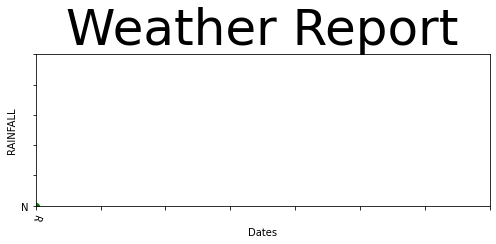

In [ ]:
from numpy.lib.shape_base import column_stack
import numpy as np
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('/content/Five year data of that lon-lat.csv','r') as csvfile:
    lines = pd.read_csv(csvfile, delimiter=',',usecols=columns)
    for row in lines:
        x.append(row[0])
        y.append((row[3]))

plt.plot(x, y, color = 'g', linestyle = 'none',
         marker = 'o',label = "RAINFALL",)

plt.xticks(rotation = 250)
plt.xlabel('Dates')
plt.ylabel('RAINFALL')
plt.title('Weather Report', fontsize = 50)
plt.yticks(np.arange(0, 60, step=10))
plt.xticks(np.arange(0, 2300, step=300))
plt.figure(figsize=(250, 100))
plt.plot(x, y, color = 'g', linestyle = 'none',
         marker = 'o',label = "RAINFALL")
plt.yticks(np.arange(0, 60, step=10))
plt.xticks(np.arange(0, 2300, step=300))
display(plt.plot(x, y))

In [ ]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, landscape
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
import csv

#Open the CSV file
with open('/content/Five year data of that lon-lat.csv', 'r') as file:
    # Read the Cz2.csvSV file
    reader = csv.reader(file)
    # Create a PDF file
    pdf_file = SimpleDocTemplate("My_lon_lat-5 year_data.pdf",pagesize=landscape(letter))
    # Create a table
    table = Table([row for row in reader])
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.gray),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, -1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))
    pdf_file.build([table])

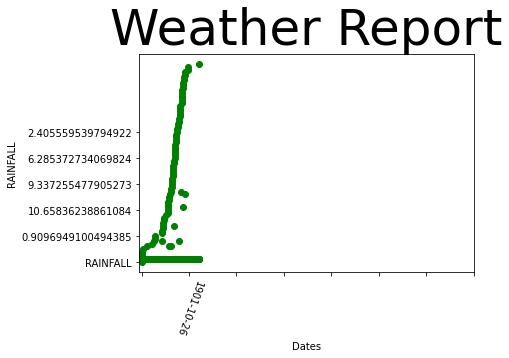

In [ ]:
from numpy.lib.shape_base import column_stack
import numpy as np
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('/content/xyz.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append((row[1]))

plt.plot(x, y, color = 'g', linestyle = 'none',
         marker = 'o',label = "RAINFALL")

plt.xticks(rotation = 250)
plt.xlabel('Dates')
plt.ylabel('RAINFALL')
plt.title('Weather Report', fontsize = 50)
plt.yticks(np.arange(0, 60, step=10))
plt.xticks(np.arange(0, 2300, step=300))
plt.figure(figsize=(250, 100))
plt.plot(x, y, color = 'g', linestyle = 'none',
         marker = 'o',label = "RAINFALL")
plt.yticks(np.arange(0, 60, step=10))
plt.xticks(np.arange(0, 2300, step=300))
display(plt.plot(x, y))

AttributeError: ignored

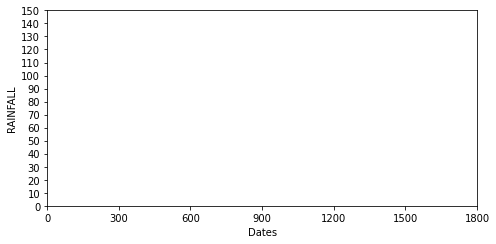

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
starting_date="2017-01-01"
ending_date='2021-12-31'
date_range=pd.date_range(start=starting_date,end=ending_date)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Make a list of columns
columns = ['RAINFALL']

# Read a CSV file
DF = pd.read_csv("/content/Five year data of that lon-lat.csv", usecols=columns)












'''date_time = pd.to_datetime(date_range)
#data+[1,2,3]

#DF['value'] = columns
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()'''
#plt.show()













# Plot the lines
#df.plot()
plt.xlabel('Dates')
plt.ylabel('RAINFALL')
plt.yticks(np.arange(0, 160, step=10))
plt.xticks(np.arange(0, 2100, step=300))
plt.xaxis_date()

plt.show()

In [ ]:
import pandas as pd
starting_date="2017-01-01"
ending_date='2021-12-31'
date_range=pd.date_range(start=starting_date,end=ending_date)
print(date_range)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')


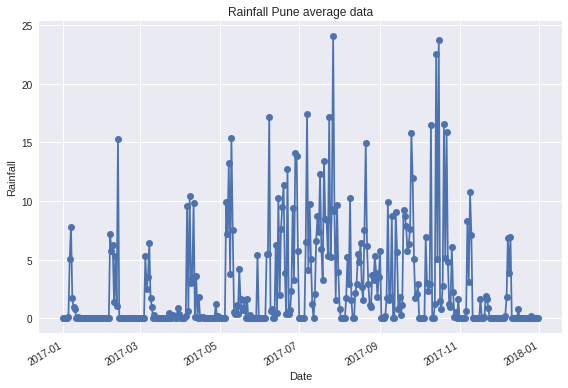

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

data = pd.read_csv('/content/a.csv')

data['TIME'] = pd.to_datetime(data['TIME'])
data.sort_values('TIME', inplace=True)

price_date = data['TIME']
price_close = data['mean']

plt.plot_date(price_date, price_close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Rainfall Pune average data')
plt.xlabel('Date')
plt.ylabel('Rainfall')

plt.tight_layout()

plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

filename = '/content/Five year data of that lon-lat of Kolkata.csv'
data = pd.read_csv(filename)
ConvertToMatrix = data.values
time = np.delete(ConvertToMatrix,[1,2],axis=1)
voltage = np.delete(ConvertToMatrix,[0,2],axis=1)
NumOfSampels= len(voltage)
plt.plot(voltage)
voltage1 = voltage.transpose()
samplFreq = 1.25e9
Pxx, freqs = plt.psd(voltage1,
NFFT=256,Fs=samplFreq,
detrend=mlab.detrend_mean,
window=mlab.window_hanning,noverlap=0,sides='onesided',scale_by_freq=True,
return_line=None)
plt.show()

FileNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the rainfall data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Five year data of that lon-lat of Pune (1).csv")

# Extract the rainfall time series as a NumPy array
rainfall = df["RAINFALL"].values

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft(rainfall)
power_spectrum = np.abs(fft)**0.5
#power_spectrum1=np.(power_spectrum)

# Plot the power spectrum
plt.plot(power_spectrum)
#plt.xticks(np.arange(1, 2300, step=300))
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.show()
sns.distplot(power_spectrum,color = 'red')

FileNotFoundError: ignored

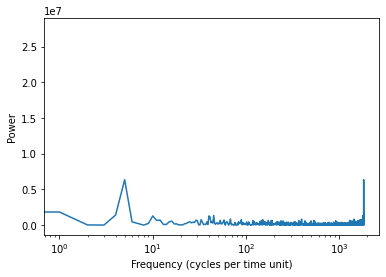

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the rainfall data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Five year data of that lon-lat of Bangalore.csv")

# Extract the rainfall time series as a NumPy array
rainfall = df["RAINFALL"][:].values

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft((rainfall))
power_spectrum = np.abs((fft))**2
#power_spectrum1=(power_spectrum)
#################
#kfreq = np.fft.fftfreq(npix)*npix
# Plot the power spectrum
plt.xscale("log")
#plt.yscale("log")
#freq=np.fft.fftfreq(len(rainfall))
plt.plot(power_spectrum)
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.show()


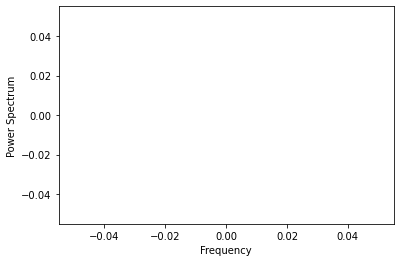

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = np.genfromtxt('/content/Five year data of that lon-lat of Pune (2).csv', delimiter=',')
data=data[RAINFALL].values
# Apply a Fourier transform to the data
fft_data = np.fft.fft())

# Calculate the power spectrum
power_spectrum = np.abs(fft_data)**2

# Create a frequency array
freq = np.fft.fftfreq(len(data))

# Plot the power spectrum against the frequency
plt.plot(freq, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()

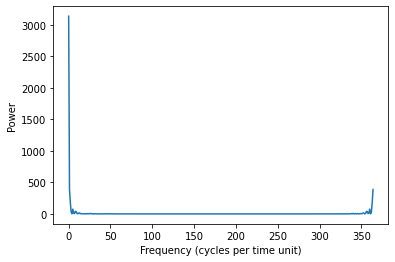

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the rainfall data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/pune soil data.csv")

# Extract the rainfall time series as a NumPy array
rainfall = df["swvl1"][:].values

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft((rainfall))
power_spectrum = np.abs((fft))**2
power_spectrum1=(power_spectrum)
#################
#kfreq = np.fft.fftfreq(npix)*npix
# Plot the power spectrum
#plt.xscale("log")
#plt.yscale("log")
plt.plot(power_spectrum1)
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
csvfile=open('/content/Five year data of that lon-lat.csv')
csvreader=csv.reader(csvfile)
readdata=next(csvreader)
csvfile.close()

data=np.array([readdata],dtype='float')
data1=data.reshape(6317,)

sp = np.fft.fft(data1)
sp_mag=np.abs(sp)/data1.size

freq = np.fft.fftfreq(data1.shape[-1])

plt.subplot(2,1,1)
plt.plot(data1)

plt.subplot(2,1,2)
plt.plot(freq,sp_mag)

plt.show()

ValueError: ignored

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
with open('/content/Five year data of that lon-lat.csv', 'r') as csvfile:
    data_str = csvfile.read() # Read the data
data = data_str.split(',') # Use comma as the delimiter
timestamp = data[0] + data[1] # Timestamp as YYYY-MM-DD hhh:mmm:ss
f0 = 0 # Start Frequency
f1 =1 # Stop Frequency
df = float(data[3]) # Frequency Spacing
sig = np.array(data[6:], dtype=float) # Signal data
freq = np.arange(f0, f1, df) / 1e9 # Frequency Array#
dataplt.plot(freq, sig)
plt.xlim([freq[0], freq[-1]])
plt.ylabel('PSD (dB)')
plt.xlabel('Freq (GHz)')
plt.show()

ValueError: ignored

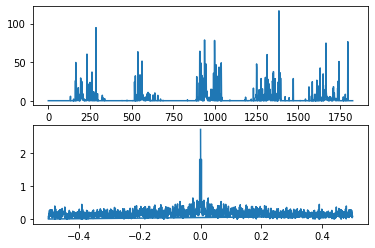

In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
csvfile=open('/content/Five year data of that lon-lat of Pune (1).csv')
csvreader=csv.reader(csvfile)
readdata=next(csvreader)
csvfile.close()

data=df["RAINFALL"].values
#data1=data.reshape()

sp = np.fft.fft(data)
sp_mag=np.abs(sp)/data.size

freq = np.fft.fftfreq(data.shape[-1])

plt.subplot(2,1,1)
plt.plot(data)

plt.subplot(2,1,2)
plt.plot(freq,sp_mag)

plt.show()

In [ ]:
pip install division

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement division (from versions: none)
ERROR: No matching distribution found for division


In [ ]:
 __future__ import division
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

SyntaxError: ignored

In [ ]:
import numpy as np
a=[1,2,3]
b=([a[0],np.sum(a[0:2]),np.sum(a[0:3])],[0, a[1],np.sum(a[1:3])],[0,0,a[2]])
print(b)






([1, 3, 6], [0, 2, 5], [0, 0, 3])


In [ ]:

df = pd.read_csv("/content/rainfall data.csv")
'''my_month=int(input("Enter the number of days in your month:"))
before_month_1=int(input("Enter the number of 31 days month before your month:"))
before_month_2=int(input("Enter the number of 30 days month before your month:"))
before_month_3=int(input("Enter the number of 28 days month before your month:"))
x=df.iloc[(31*before_month_1 + 30*before_month_2 + 28*before_month_3)*135*129:(31*before_month_1 + 30*before_month_2 + 28*before_month_3 + my_month)*129*135, :]'''
x=df.iloc[151*135*129:273*135*129]
x.to_csv("My_month_data.csv")


[  1.50682   3.02263   2.0157    3.70084   4.58563   6.19548   5.52358
   7.76504   7.93392  11.56563   7.26573   6.98691   5.0296    3.49576
   2.73492   4.06045   4.55177   4.09378   3.69998   4.72753   6.3257
   4.16809   4.52106   2.45828   1.59865   0.2416    1.59445   1.74384
   0.74181   1.65183   5.28079   6.48272   6.28933   5.94247   4.68574
   3.60517   4.14121  -1.01767   7.34417   7.99422  11.49345  10.78137
  13.55028  15.41958  14.98225  14.62747  23.13668  17.50273   8.35957
   4.81389   2.34053   3.52992  -2.8907   -2.86304   5.72552   4.61311
   4.31407   5.44523   5.69254   5.85833   4.82994   6.02824   7.514
  11.50991  14.20691  19.26479   5.1522    2.90021   5.96007   5.10328
   3.35593   2.87136   3.772     2.04359   1.51903   2.13633   2.87507
  16.46997  18.71202  22.7583   23.38171  21.65454  19.07313  19.08764
  18.9544   17.88504  15.87772  18.03174   9.96436  15.11529  14.00437
  14.92904  14.45108  14.04153  13.98037  16.0744   17.10773  16.81285
  15.9978

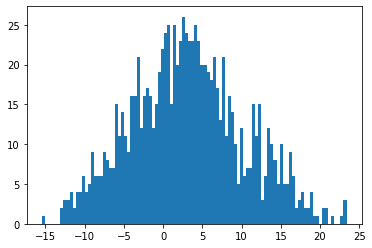

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal

temp = np.genfromtxt('PolarAVGvTime.out')

data = temp[1:1000,:]

scale = np.arange(len(data),0,-1)
#scale = np.ones(len(data))

def autocorr(x):
    result = scipy.signal.correlate(x, x, mode='full', method='fft')
    idea = result[result.size // 2:]
    idea2 = np.divide(idea, scale)
    #print(idea2)
    return idea2

T = data[:,0]
M = data[:,1]
I = data[:,2]
MI = data[:,3]
CI = data[:,4]
R = data[:,5]
CIR = data [:,6]
time = data[:,7]


T_2 = T**2

tau=240

a = np.exp(-time/tau)

#a_T = np.array(z_T)[np.newaxis]
#corr_T = np.transpose(z_T.T)
corr_MI = autocorr(MI)
corr_T = a*autocorr(T_2)
corr_I = autocorr(I)
corr_M = autocorr(M)
corr_R = autocorr(R)
corr_CI = autocorr(CI)
corr_CIR = autocorr(CIR)
corr_time = autocorr(time)

#print(corr_T)
#print(len(corr_T))
print(T)

#plt.plot(time[2:],corr_MI[2:],label='MI')
#plt.plot(time[2:],corr_T[2:],label='T')
#plt.plot(time[2:],corr_I[2:],label='I')
#plt.plot(time[2:],corr_R[2:],label='R')
#plt.plot(time[2:],corr_CI[2:],label='CI')
#plt.plot(time[2:],corr_CIR[2:],label='CIR')

#plt.plot(time,T**2)

#plt.plot(time,corr_T)

#plt.legend()

plt.hist(T,bins=100)

plt.show()

In [ ]:
import numpy as np
import  pandas as pd
df=pd.read_csv("/content/Five year data of that lon-lat of Bangalore.csv")
df.apply(np.max)


TIME         2021-12-31
LONGITUDE          78.0
LATITUDE           13.0
RAINFALL          175.0
dtype: object

In [ ]:
df.mean()

<ipython-input-27-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


LONGITUDE    78.000000
LATITUDE     13.000000
RAINFALL      2.882561
dtype: float64

In [ ]:
df.median()

<ipython-input-28-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


LONGITUDE    78.0
LATITUDE     13.0
RAINFALL      0.0
dtype: float64

In [ ]:
df.round(2).mode()

,TIME,LONGITUDE,LATITUDE,RAINFALL
0,2017-01-01,78.0,13.0,0.0
1,2017-01-02,NaN,NaN,NaN
2,2017-01-03,NaN,NaN,NaN
3,2017-01-04,NaN,NaN,NaN
4,2017-01-05,NaN,NaN,NaN
...,...,...,...,...
1821,2021-12-27,NaN,NaN,NaN
1822,2021-12-28,NaN,NaN,NaN
1823,2021-12-29,NaN,NaN,NaN
1824,2021-12-30,NaN,NaN,NaN


NameError: ignored

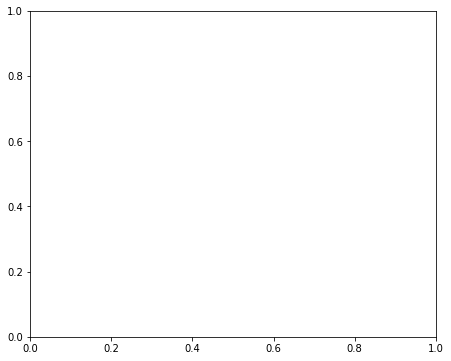

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

df=pd.read_csv("/content/Five year data of that lon-lat of Bangalore.csv")
plt.figure(figsize=(16,6))
plt.subplot(121)
normal_rates=np.random.normal(0,1,(1000000,1))
sns.distplot(normal_rates)

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

filename1=(['/content/RF25_IMD0p252020.nc',"/content/RF25_IMDp252021.nc"])

In [ ]:
nlat=129				# Obtained from the ctl file
nlon=135
nyear=2
years=np.arange(2020,2021,1)
lons=np.arange(67.5,98.5,0.25)	# Define latitude and longitude as obtained from ctl file
print(lons)
lats=np.arange(7.5,38.5,0.25)
#print(lats)

latbounds = [ 18.0 , 29.0 ]	#Lat-lon bound for Heat Wave (MZI)
lonbounds = [ 65.0 , 89.0 ] 	# degrees east

[67.5  67.75 68.   68.25 68.5  68.75 69.   69.25 69.5  69.75 70.   70.25
 70.5  70.75 71.   71.25 71.5  71.75 72.   72.25 72.5  72.75 73.   73.25
 73.5  73.75 74.   74.25 74.5  74.75 75.   75.25 75.5  75.75 76.   76.25
 76.5  76.75 77.   77.25 77.5  77.75 78.   78.25 78.5  78.75 79.   79.25
 79.5  79.75 80.   80.25 80.5  80.75 81.   81.25 81.5  81.75 82.   82.25
 82.5  82.75 83.   83.25 83.5  83.75 84.   84.25 84.5  84.75 85.   85.25
 85.5  85.75 86.   86.25 86.5  86.75 87.   87.25 87.5  87.75 88.   88.25
 88.5  88.75 89.   89.25 89.5  89.75 90.   90.25 90.5  90.75 91.   91.25
 91.5  91.75 92.   92.25 92.5  92.75 93.   93.25 93.5  93.75 94.   94.25
 94.5  94.75 95.   95.25 95.5  95.75 96.   96.25 96.5  96.75 97.   97.25
 97.5  97.75 98.   98.25]


In [ ]:

npos=59
jjas_days=122
lp=0
nlp=0
lpdays=366
nlpdays=365
fill=99.9
a=0

MaxTemp=np.full([nyear,nlpdays,nlat,nlon],fill,order='C')	# Create an empty 4d array to store data
na=np.full([nlat,nlon],fill,order='C')				# Array to be given for leap year day in non-leap years

In [ ]:
for files in glob.glob(filename1):
	f=open(files,'rb')
	maxdata=np.fromfile(f,dtype="float32",count=-1)				#  Reading the file into a 1D array
	y=years[a]
	if (y%4==0):
		maxtemp=np.reshape(maxdata,(lpdays,nlat,nlon),order='C')	#Reading variable in required shape
		MaxTemp[a,:,:,:]=maxtemp					# Storing variable in the empty array
	else:
		maxtemp=np.reshape(maxdata,(nlpdays,nlat,nlon),order='C')
		maxtemp=np.insert(maxtemp,npos,na,axis=0)
		MaxTemp[a,:,:,:]=maxtemp					# Storing variable in the empty array
	a=a+1
#print(MaxTemp.shape)
del files
del f

TypeError: ignored

In [ ]:
#######PYTHON CODE FOR IMD PREPARED BY LEKSHMI S#########
########## https://doi.org/10.5281/zenodo.5674826 ############

############################READING A NETCDF4 FILE USING XARRAY######################################
##########################Import necessary Modules###################
import xarray as xr

##########Read the dataset using xarray##########################
filename="/content/RF25_IMD0p252020.nc"
da=xr.open_mfdataset(filename)
#print(da)

############Read the individual variables in the dataset########
rf=da.RAINFALL
lat=da.LATITUDE
lon=da.LONGITUDE
#print(lon)

################ Subsetting in all dimensions###################
da1=da.sel(TIME=slice('01-06-2020','30-09-2020'),LATITUDE=slice(7.5,20.5),LONGITUDE=slice(68.0,90.5))
print(da1)

#####################Choosing a few months######################
mamj = da.TIME.dt.month.isin(range(3, 7))       #Reading March-June
da2=da.sel(TIME=mamj)
#print(da2)

##########Choosing pre-defined seasons in xarray using groupby#########
da3=da.groupby("TIME.season")["MAM"]        #Choosing MAM
print("y=",da3)

da4=da.groupby("TIME.season")["MAM"].mean(dim="TIME")   #Calculating Seasonal Mean
print("x=",da4)

<xarray.Dataset>
Dimensions:    (LONGITUDE: 91, LATITUDE: 53, TIME: 269)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 68.0 68.25 68.5 68.75 ... 90.0 90.25 90.5
  * LATITUDE   (LATITUDE) float64 7.5 7.75 8.0 8.25 ... 19.75 20.0 20.25 20.5
  * TIME       (TIME) datetime64[ns] 2020-01-06 2020-01-07 ... 2020-09-30
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(269, 53, 91), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 16-Mar-22
    Conventions:  CF-1.6
y= <xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 92)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-05-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(92, 129, 135), meta=np.ndarray>
Attributes:
    history:      FERRE

In [ ]:
#########PYTHON CODE FOR IMD PREPARED BY LEKSHMI S############
########## https://doi.org/10.5281/zenodo.5674826 ############

##################SUBSETTING A NETCDF4 FILE#########################
###########Import necessary modules##########################

import netCDF4 as nc
import datetime as dt
import numpy as np

############ File to be read ####################
############ IMD Gridded Rainfall data ##########

file_name  = "/mnt/e/Python_Scripts/Sample_Data/RFone_imd_rf_1x1_2019.nc"

################# open file ######################

f = nc.Dataset(file_name)
print(f)                # gives us information about the variables
                        #contained in the file and their dimensions

for dim in f.dimensions.values():
    print(dim)          # Metadata for all dimensions

for var in f.variables.values():
    print(var)          # Metadata for all variables

print(f['rf'])          # Metadata of single variable

################# read variables  ################

rf   = f.variables['rf'][:]
lats = f.variables['lat'][:]
lons = f.variables['lon'][:]
time = f.variables['time']		# In the file for the time dimension year has been set as 2010 in all year files

print(lons.min()," ,",lons.max())

################Subscripting over lat, lon and time####################

############Subsetting over time##############

st_date=dt.datetime(2010,1,10,0,0)	#Giving 2010 as year only applicable for IMD rainfall files
					#Give the required time step here
en_date=dt.datetime(2010,2,10,0,0)	# End date and hour
date=nc.num2date(time[:],units=time.units,calendar='standard')

istart=nc.date2index(st_date,time,calendar='standard',select='exact')
iend=nc.date2index(en_date,time,calendar='standard',select='exact')

############Subsetting over lat and lon##############

latbounds = [ 10 , 20 ]
lonbounds = [ 70.5 , 90.5 ] # degrees east

latselect=np.logical_and(lats>=latbounds[0],lats<=latbounds[1])
lonselect=np.logical_and(lons>=lonbounds[0],lons<=lonbounds[1])

rfsub1=f.variables['rf'][istart:iend,latselect,lonselect]
print(rfsub1.max())
print(rfsub1.shape)

exit()

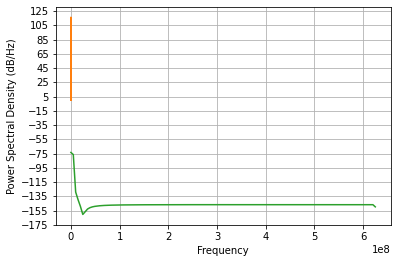

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

filename = '/content/Five year data of that lon-lat of Pune (1).csv'
data = pd.read_csv(filename)
ConvertToMatrix = data.values
time = np.delete(ConvertToMatrix,[1,2],axis=1)
voltage = np.delete(ConvertToMatrix,[0,2],axis=1)
NumOfSampels= len(voltage)
plt.plot(voltage)
voltage1 = voltage.transpose()
samplFreq = 1.25e9
Pxx, freqs = plt.psd(voltage1,
NFFT=256,Fs=samplFreq,
detrend=mlab.detrend_mean,
window=mlab.window_hanning,noverlap=0,sides='onesided',scale_by_freq=True,
return_line=None)
plt.show()

In [ ]:
fn  = "/content/RF25_IMD0p252020.nc"
in = addfile(fn,"r")
soi  = in->RAINFALL

d = 0

sm = 7

pct = 0.10
spec = specx_anal(soi,d,sm,pct)
wks  = gsn_open_wks("png","spec")

res = True
res@tiMainString = "SOI"		           ; title
res@tiXAxisString = "Frequency (cycles/month)"
res@tiYAxisString = "Variance"

plot=gsn_csm_xy(wks,spec@frq,spec@spcx,res)

SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the rainfall data from a CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Five year data of that lon-lat of Bangalore.csv")

# Extract the rainfall time series as a NumPy array
rainfall = df["RAINFALL"].values

# Calculate the power spectrum using the fast Fourier transform (FFT)
fft = np.fft.fft(rainfall)
power_spectrum = np.abs(fft)**2
power_spectrum1=np.log(power_spectrum)
#################
#kfreq = np.fft.fftfreq(npix)*npix
# Plot the power spectrum
plt.plot(power_spectrum1)
plt.xlabel("Frequency (cycles per time unit)")
plt.ylabel("Power")
plt.show()